# Assignment: The Breast Cancer Data

Import the breast cancer data set using `read_csv`. Based on the code of this lesson, try to do the following:

- Get the summary (univariate) statistics of columns 2-10 (accessing indices 1:10) using `describe`
- Plot the means of each column as a bar chart with standard deviations as error bars. Why are some bars invisible?
- Extract the values as Numpy array using `to_numpy`. The shape of the array should be (569, 31).
- Calculate the correlation matrix using `corrcoef` from Numpy and plot it as a heatmap. The shape of the matrix should be (31, 31). Use `fill_diagonal` to set the diagonal elements to 0.
- Calculate the average column correlation and plot it as a bar chart.
- Calculate the average correlation strength of the data set.

In case of doubt, try to get help from the respective documentations for Pandas dataframes, Numpy and Matplotlib.


In [11]:
# To import data from a csv file into a Pandas dataframe
from pandas import read_csv

# To import a dataset from scikit-learn
from sklearn import datasets

# To create figure environments and plots
from matplotlib.pyplot import subplots, show, imshow

# Specific numpy functions
from numpy import corrcoef, fill_diagonal, triu_indices, arange, mean


In [12]:
df = read_csv('data/breast_cancer.csv')
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
df_describe = df.iloc[:, 1:10].describe()
df.iloc[:, 1:10].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000


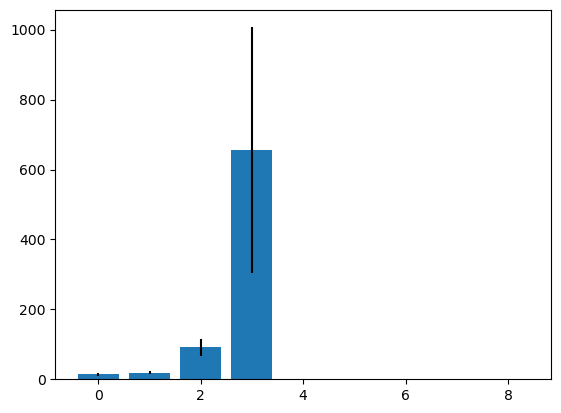

The reason why some bars are invisible is there is a number 654.889104 which is significantly largerthan the rest mean numbers which are below 1. Because of this huge gap they cannot be shown together in one bar chart


In [14]:
df_describe = df.iloc[:, 1:10].describe()
fig, ax = subplots()
bins = arange(df_describe.shape[1])
ax.bar(bins, df_describe.loc['mean'], yerr=df_describe.loc['std'])
show()
print('The reason why some bars are invisible is there is a number 654.889104 which is significantly larger'
      'than the rest mean numbers which are below 1. Because of this huge gap they cannot be shown together in one bar chart'
     )

In [15]:
df_np = df.to_numpy()
df_np.shape

(569, 31)

In [16]:
df_corr_matrix = corrcoef(df_np, rowvar = False)
print(df_corr_matrix.shape)

               

(31, 31)


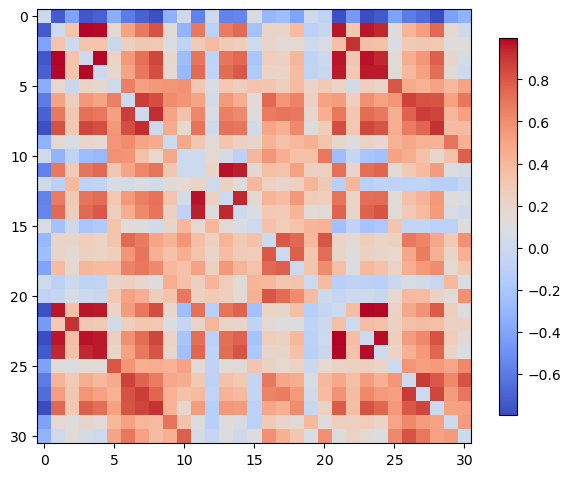

In [17]:
fill_diagonal(df_corr_matrix, 0)

fig, ax = subplots(figsize=(7,7))

im = ax.imshow(df_corr_matrix, cmap='coolwarm');

fig.colorbar(im, orientation='vertical', shrink=0.7);

show()

[0.45516882 0.45660513 0.23575963 0.47067496 0.45370416 0.33211789
 0.53072851 0.55695244 0.54401833 0.32765992 0.30596484 0.42636024
 0.15089674 0.43943067 0.4087742  0.18889121 0.40090314 0.35163021
 0.41044776 0.18233102 0.27283171 0.48041678 0.2451192  0.49447007
 0.4673147  0.30033661 0.46577964 0.49681254 0.5344634  0.2906881
 0.31566776]


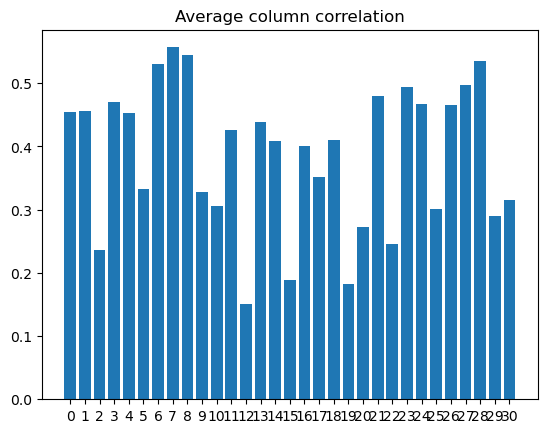

In [43]:
f_corr_abs = abs(df_corr_matrix)
df_corr_mean = mean(df_corr_abs, axis = 0)
fig, ax = subplots()
bins_corr_mean = arange(df_corr_mean.shape[0])
ax.bar(bins_corr_mean, df_corr_mean)
print(df_corr_mean)
ax.set_title('Average column correlation')
ax.set_xticks(arange(len(df_corr_matrix)))
show()

In [46]:
df_corr_matrix_average = mean(abs(df_corr_matrix))
print('The correlation matrix average is ', round(df_corr_matrix_average, 3))

The correlation matrix average is  0.387
